In [4]:
%load_ext rpy2.ipython

#The FMRP data set

##Use nonlinear programming

##Use MCMC

#Large data set from TADA in 2013

## Use nonlinear programming

## Use MCMC


In [5]:
#!gist -p Test_nloptr_rjags_forDenovoData_finalVersion.ipynb

In [107]:
#!gist -u https://gist.github.com/2ab4f26a16cf7876c79c Test_nloptr_rjags_forDenovoData_finalVersion.ipynb

#The TADA paper in 2013)

##Use constrained optimization (function NLMMINB)

In [56]:
%%R
library("data.table")

dirFile = "/usr/data/Documents/SaveDataFromServer/CombinedDataThreeDiseases/"
fileN = "result.nloptr.outerProduct.nonlinearNLMMINB.onlyDenovo.LoF.dnMis3.geneSet.all20000.LargeRangesInitialValues.new1.txt"
#fileN = "result.nloptr.outerProduct.nonlinearNLMMINB.onlyDenovo.LoF.dnMis3.geneSet.all20000.LargeRangesInitialValues.txt"
#fileN = "result.nloptr.outerProduct.nonlinearNLMMINB.onlyDenovo.LoF.dnMis3.geneSet.FMRP.largeRanges.txt"
nloptr.result <- fread(paste(dirFile, fileN, sep = ""))



In [57]:
%%R

nloptr.result <- head(nloptr.result, 100)
#nloptr.result <- nloptr.result[V1 < 0.08]
#nloptr.result <- nloptr.result[V2 > 15]
#print(dim(nloptr.result))



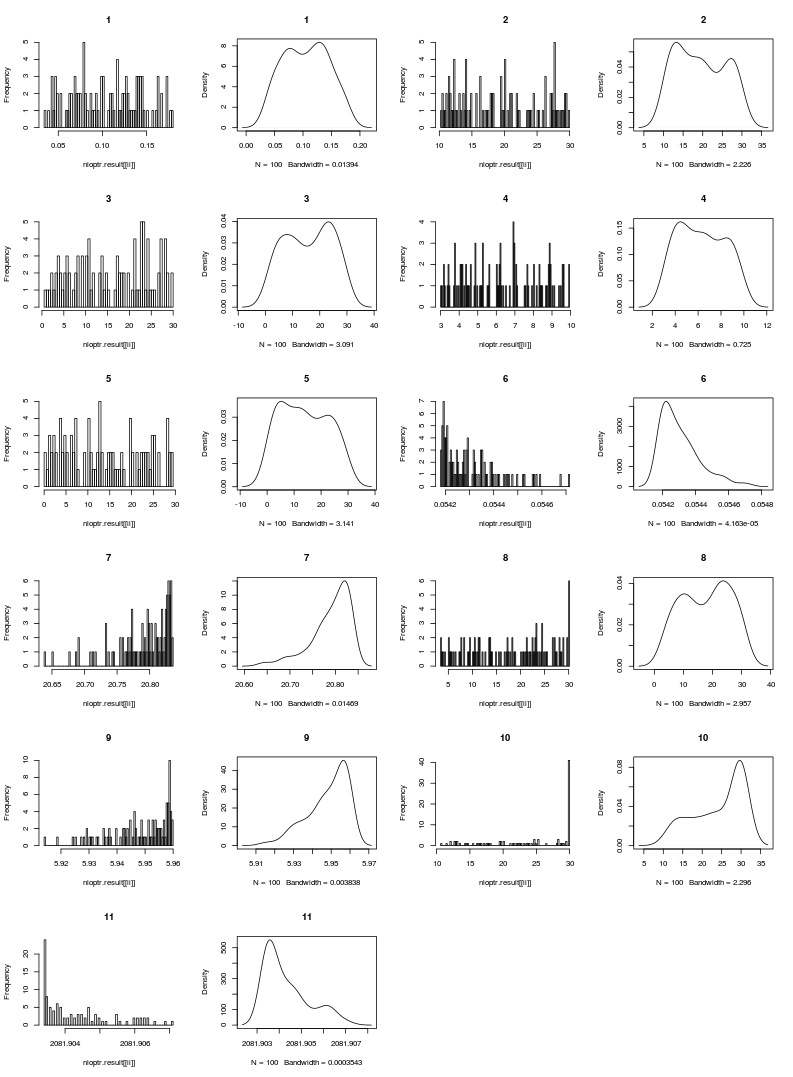

In [58]:
%%R -w 28 -h 38 -u cm
par(mfrow = c(6, 4))
for (ii in 1:dim(nloptr.result)[2]){
    hist(nloptr.result[[ii]], 100, main = ii)
    plot(density(nloptr.result[[ii]]), main = ii)
}

In [59]:
%%R
round(apply(nloptr.result, 2, median), 3)

      V1       V2       V3       V4       V5       V6       V7       V8 
   0.107   19.424   16.928    6.196   12.958    0.054   20.801   18.316 
      V9      V10      V11 
   5.951   27.248 2081.904 


[1] 5


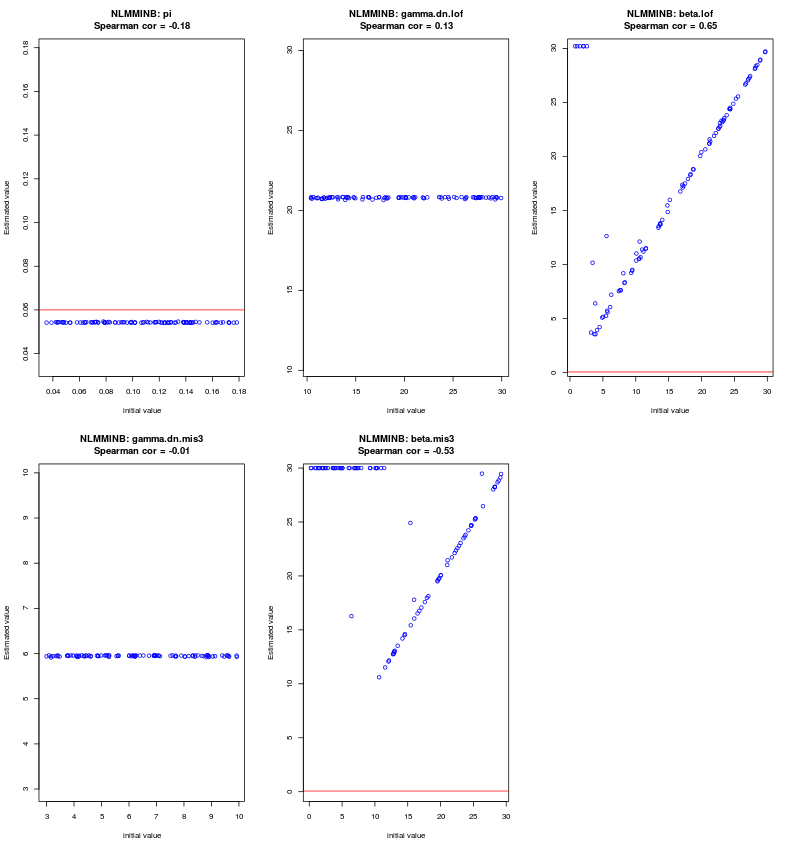

In [60]:
%%R -w 28 -h 30 -u cm

dimK <- floor(dim(nloptr.result)[2]/2)

print(dimK)
par(mfrow = c(2, 3))
colNames <- c("pi", "gamma.dn.lof", "beta.lof", "gamma.dn.mis3", "beta.mis3")
for (jj in 1:dimK){
plot(nloptr.result[[jj]], nloptr.result[[jj + dimK]], xlab = 'initial value', ylab = 'Estimated value',
    main = paste("NLMMINB: ", colNames[jj], "\nSpearman cor = ", 
                 round(cor(nloptr.result[[jj]], nloptr.result[[jj + dimK]], method = "spearman"), 2), sep = ""),
    ylim = range(nloptr.result[[jj]]), 
    col = 'blue')
    abline(h = 0.06, col = 'red')
    }

[1] 5


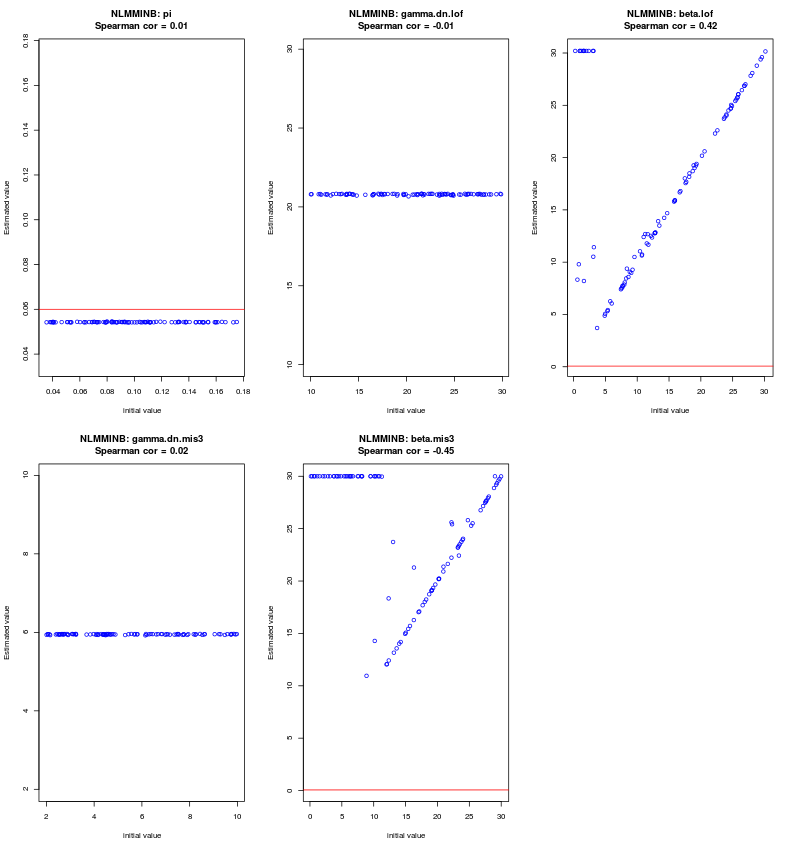

In [97]:
%%R -w 28 -h 30 -u cm


dirFile = "/usr/data/Documents/SaveDataFromServer/CombinedDataThreeDiseases/"
fileN = "result.nloptr.outerProduct.nonlinearNLMMINB.onlyDenovo.LoF.dnMis3.geneSet.all20000.LargeRangesInitialValues.new2.txt"
nloptr.result <- fread(paste(dirFile, fileN, sep = ""))



dimK <- floor(dim(nloptr.result)[2]/2)

print(dimK)
par(mfrow = c(2, 3))
colNames <- c("pi", "gamma.dn.lof", "beta.lof", "gamma.dn.mis3", "beta.mis3")
for (jj in 1:dimK){
plot(nloptr.result[[jj]], nloptr.result[[jj + dimK]], xlab = 'initial value', ylab = 'Estimated value',
    main = paste("NLMMINB: ", colNames[jj], "\nSpearman cor = ", 
                 round(cor(nloptr.result[[jj]], nloptr.result[[jj + dimK]], method = "spearman"), 2), sep = ""),
    ylim = range(nloptr.result[[jj]]), 
    col = 'blue')
    abline(h = 0.06, col = 'red')
    }

##MCMC for 2013 data (~ 20000 genes)

[1] 0.06244391


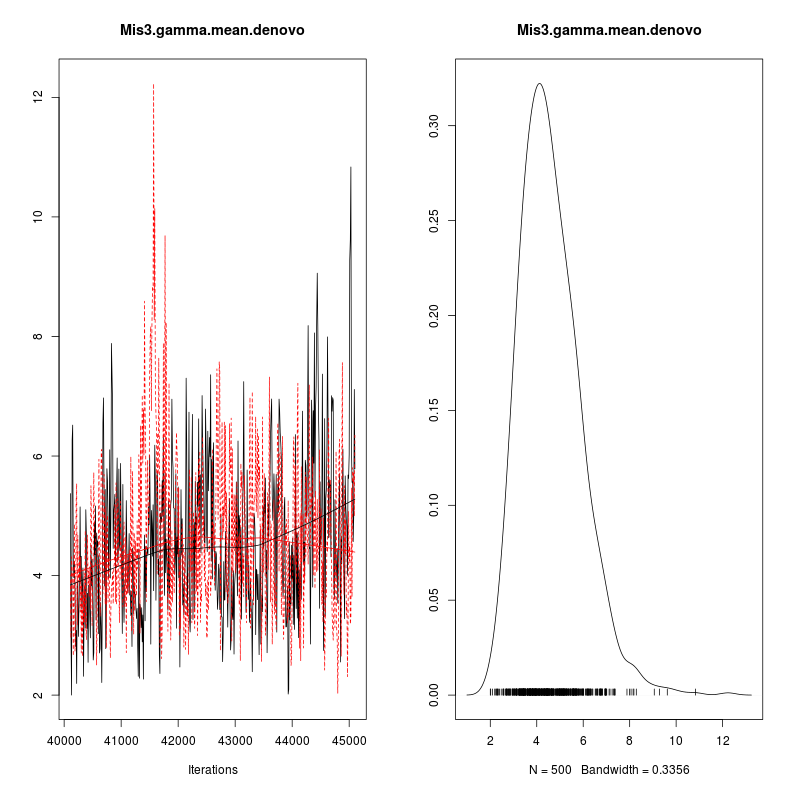

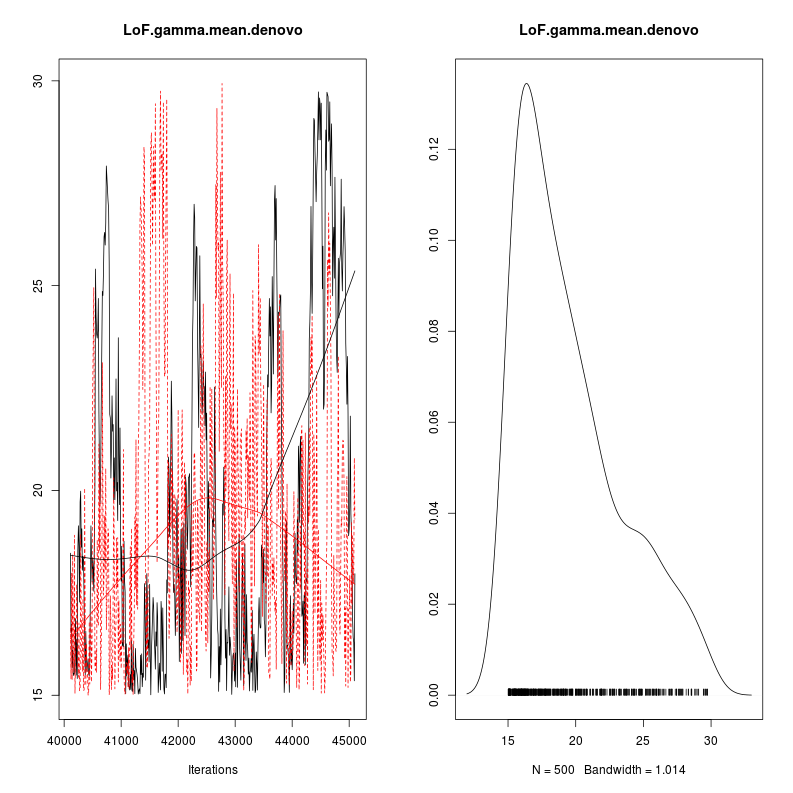

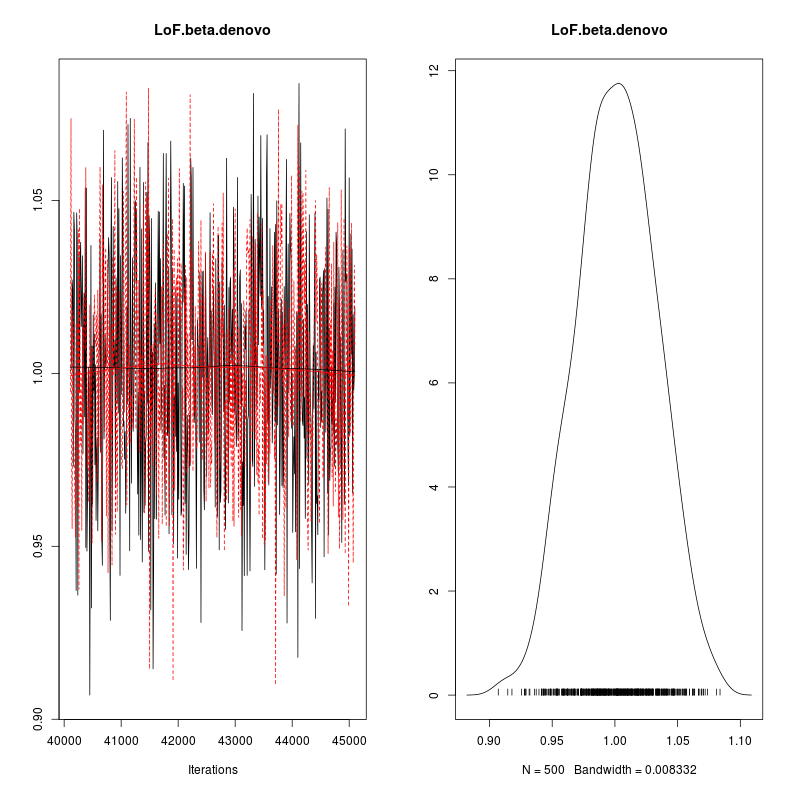

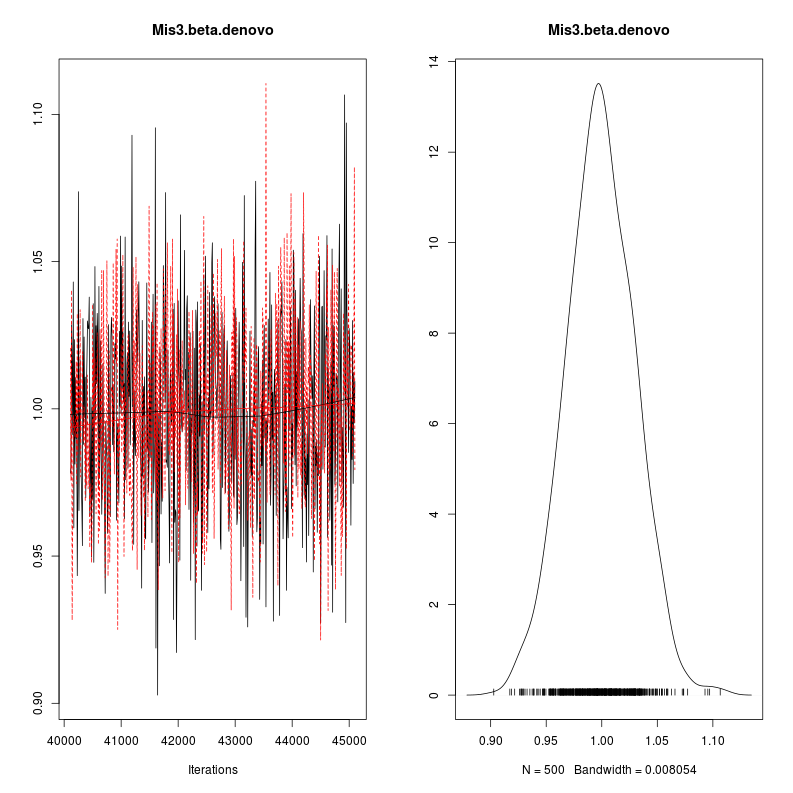

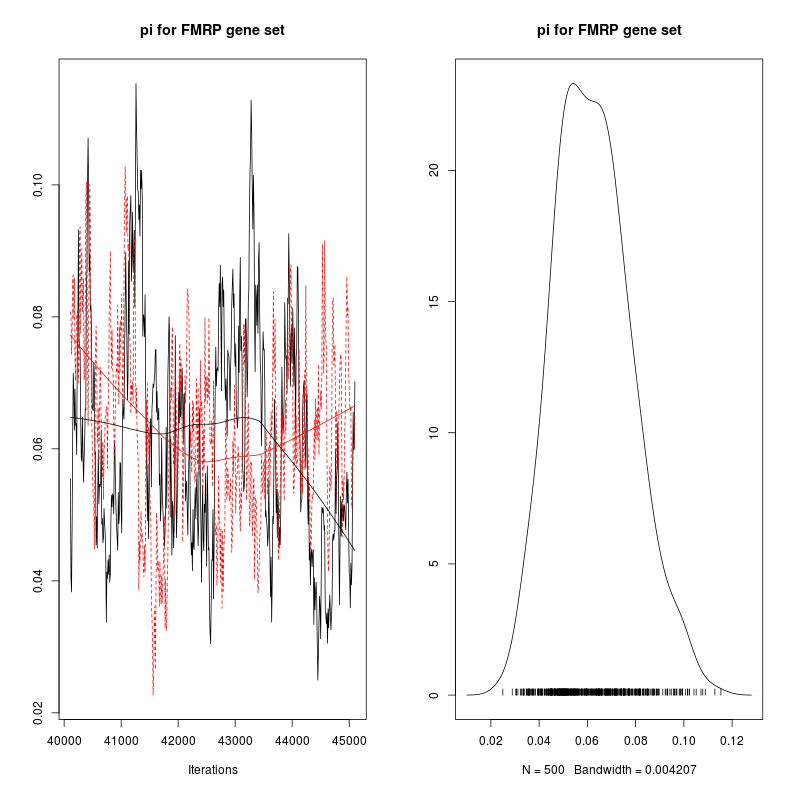

In [102]:
%%R -w 28 -h 28 -u cm
library("rjags")
listP <- list()
jj = 6
load(paste("/usr/data/Documents/SaveDataFromServer/RunRjags/test.2013Data.negativeBinomial.ConstrainedNormal.nRun5000.nBurnIn.40000.nCount.", jj, ".2.RData", sep = ""))
mcmc.gamma.mean.lof <- mcmc.list(lapply(xem1, function(x) x[, 'gamma.mean.alt.lof']))
plot(mcmc.gamma.mean.lof, main = 'LoF.gamma.mean.denovo')
out.gamma.lof <- median(sapply(mcmc.gamma.mean.lof, mean))
    
    mcmc.gamma.mean.mis3 <- mcmc.list(lapply(xem1, function(x) x[, 'gamma.mean.alt.mis3']))
plot(mcmc.gamma.mean.mis3, main = 'Mis3.gamma.mean.denovo')
out.gamma.mis3 <- median(sapply(mcmc.gamma.mean.mis3, mean))

#pdf("/Users/hoang/Documents/GitHub/TestR/HBproject/Presentation/MCMC.FMRP.beta.alt.lof.pdf")
#png("/Users/hoang/Documents/GitHub/TestR/HBproject/Presentation/MCMC_FMRP_beta_lof.png")
mcmc.beta.mean.lof <-   mcmc.list(lapply(xem1, function(x) x[, 'beta.mean.alt.lof']))
plot(mcmc.beta.mean.lof, main = 'LoF.beta.denovo')
out.beta.lof <- median(sapply(mcmc.beta.mean.lof, mean))

mcmc.beta.mean.mi3 <-   mcmc.list(lapply(xem1, function(x) x[, 'beta.mean.alt.mis3']))
plot(mcmc.beta.mean.mi3, main = 'Mis3.beta.denovo')
out.beta.mis3 <- median(sapply(mcmc.beta.mean.mi3, mean))


mcmc.p2 <- mcmc.list(lapply(xem1, function(x) x[, 'p1[2]']))
m2 <- sapply(mcmc.p2, mean)
plot(mcmc.p2, main = 'pi for FMRP gene set')
abline(v = m2, col = 'red')
out.p2 <- median(sapply(mcmc.p2, mean))
listP[jj] <- out.p2
out.p2

[1] 0.06167612


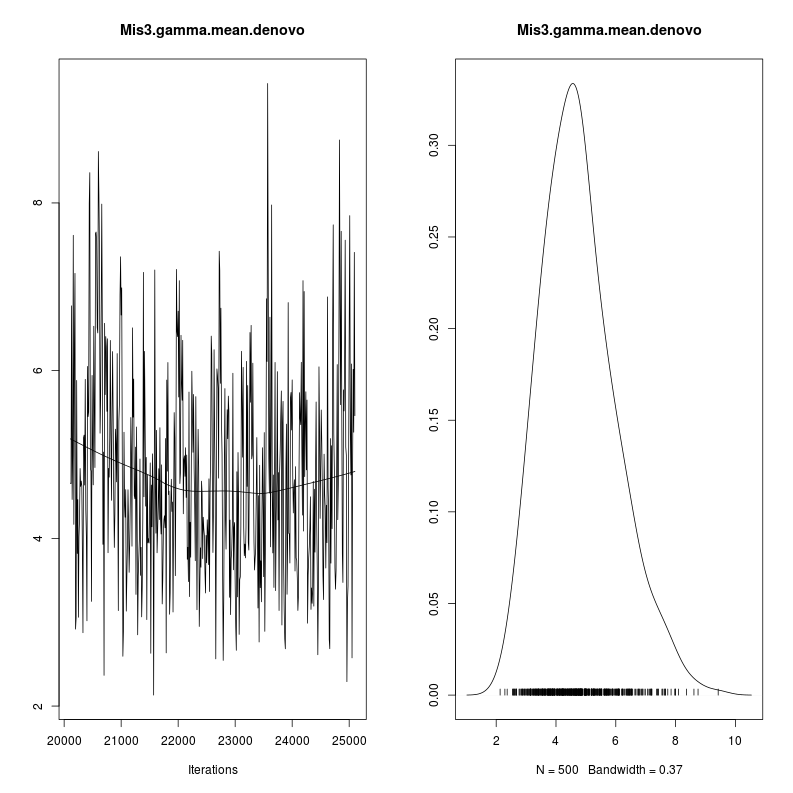

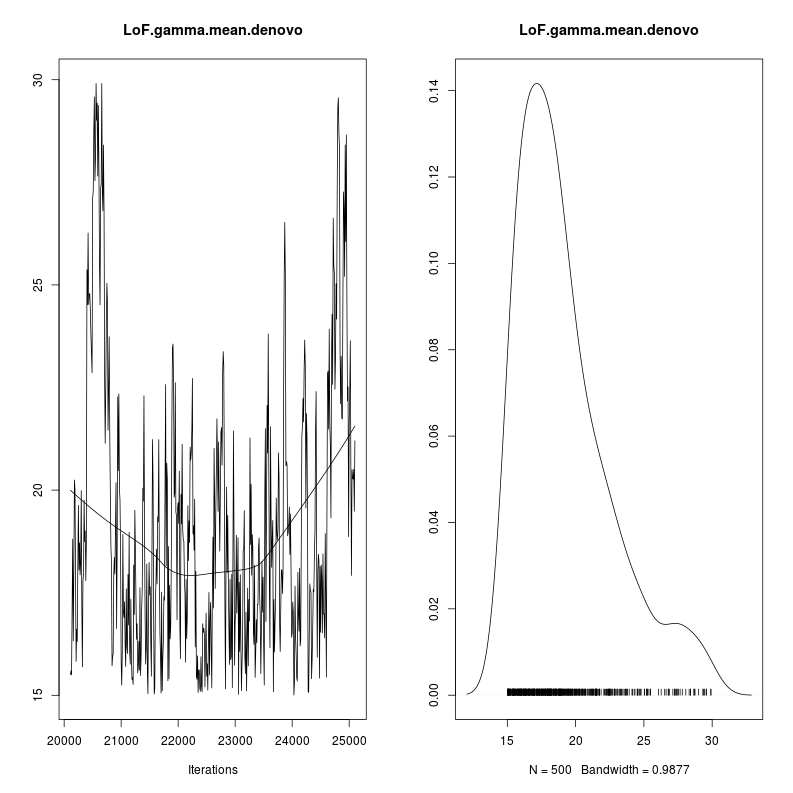

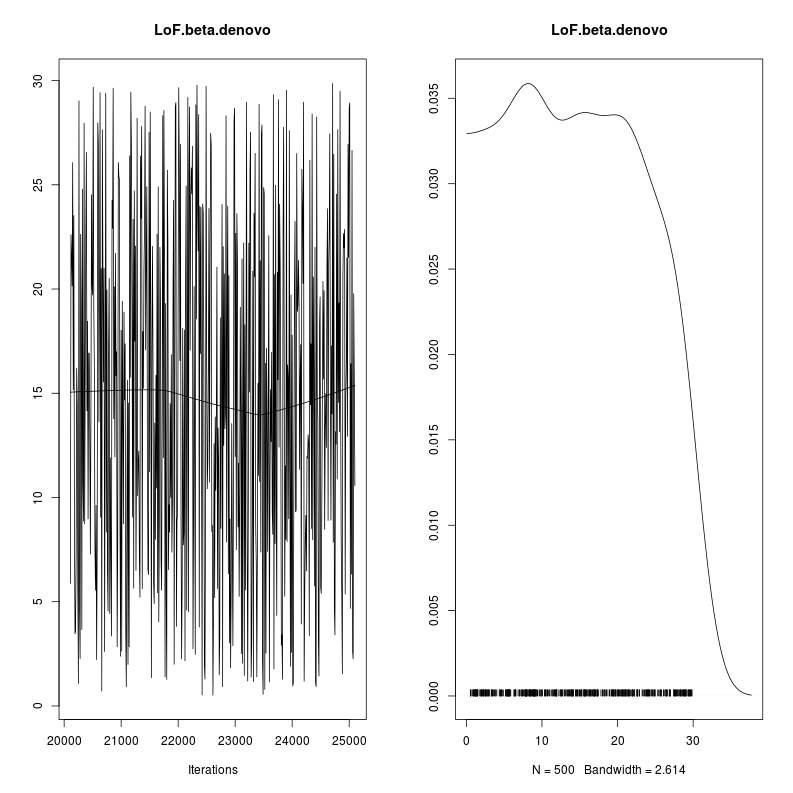

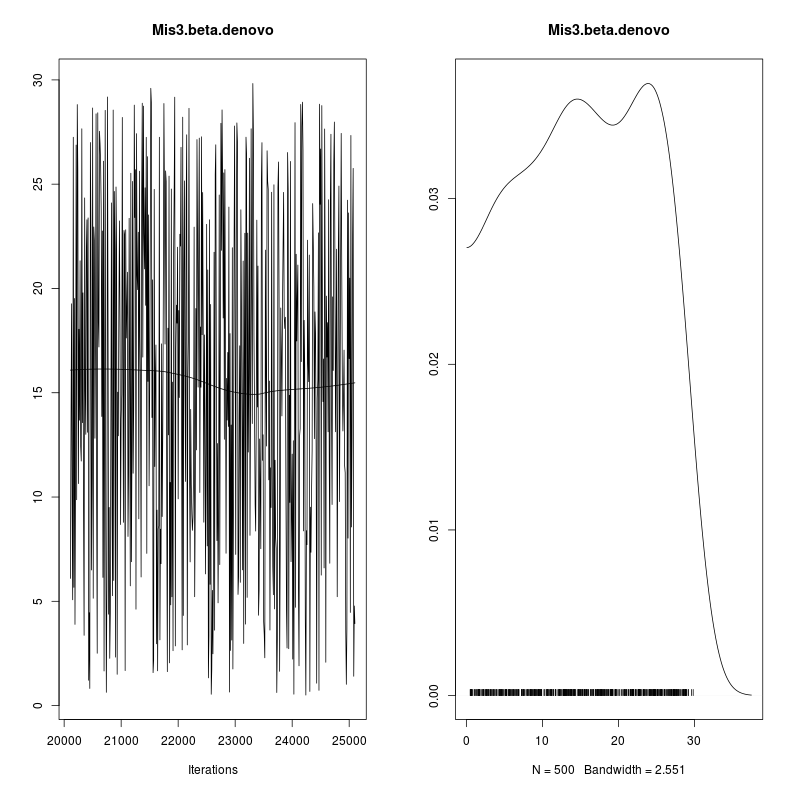

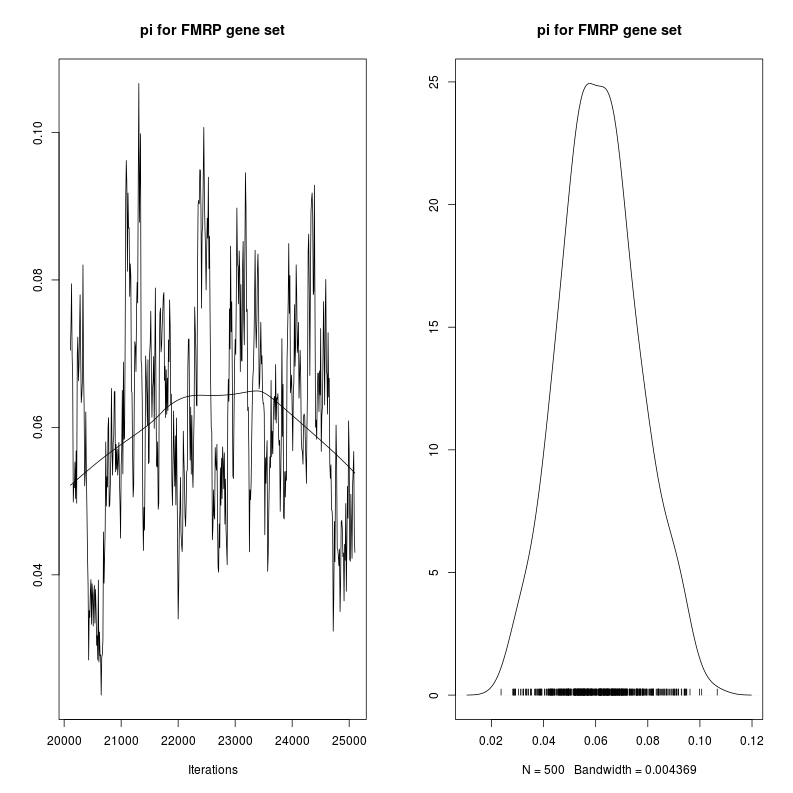

In [104]:
%%R -w 28 -h 28 -u cm
library("rjags")
listP <- list()
jj = 6
load("/usr/data/Documents/SaveDataFromServer/RunRjags/test.2013Data.negativeBinomial.uBeta.nRun5000.nBurnIn.20000.nCount.21.2.RData")
mcmc.gamma.mean.lof <- mcmc.list(lapply(xem1, function(x) x[, 'gamma.mean.alt.lof']))
plot(mcmc.gamma.mean.lof, main = 'LoF.gamma.mean.denovo')
out.gamma.lof <- median(sapply(mcmc.gamma.mean.lof, mean))
    
    mcmc.gamma.mean.mis3 <- mcmc.list(lapply(xem1, function(x) x[, 'gamma.mean.alt.mis3']))
plot(mcmc.gamma.mean.mis3, main = 'Mis3.gamma.mean.denovo')
out.gamma.mis3 <- median(sapply(mcmc.gamma.mean.mis3, mean))

#pdf("/Users/hoang/Documents/GitHub/TestR/HBproject/Presentation/MCMC.FMRP.beta.alt.lof.pdf")
#png("/Users/hoang/Documents/GitHub/TestR/HBproject/Presentation/MCMC_FMRP_beta_lof.png")
mcmc.beta.mean.lof <-   mcmc.list(lapply(xem1, function(x) x[, 'beta.mean.alt.lof']))
plot(mcmc.beta.mean.lof, main = 'LoF.beta.denovo')
out.beta.lof <- median(sapply(mcmc.beta.mean.lof, mean))

mcmc.beta.mean.mi3 <-   mcmc.list(lapply(xem1, function(x) x[, 'beta.mean.alt.mis3']))
plot(mcmc.beta.mean.mi3, main = 'Mis3.beta.denovo')
out.beta.mis3 <- median(sapply(mcmc.beta.mean.mi3, mean))


mcmc.p2 <- mcmc.list(lapply(xem1, function(x) x[, 'p1[2]']))
m2 <- sapply(mcmc.p2, mean)
plot(mcmc.p2, main = 'pi for FMRP gene set')
abline(v = m2, col = 'red')
out.p2 <- median(sapply(mcmc.p2, mean))
listP[jj] <- out.p2
out.p2

#The FMRP extracted from the paper in 2013

In [88]:
%%R
library("data.table")

dirFile = "/usr/data/Documents/SaveDataFromServer/CombinedDataThreeDiseases/"
fileN = "result.nloptr.outerProduct.TADA2013.nonlinearNLMMINB.onlyDenovo.LoF.mis3.geneSet.all20000.txt"
fileN = "result.nloptr.outerProduct.nonlinearNLMMINB.bothLoF.dnMis3.geneSet.FMRP.largeRange.txt"
fileN = "result.nloptr.outerProduct.nonlinearNLMMINB.onlyDenovo.LoF.dnMis3.geneSet.FMRP.txt"
#fileN = "result.nloptr.outerProduct.nonlinearNLMMINB.onlyDenovo.LoF.dnMis3.geneSet.FMRP.largeRanges.1.txt"
#fileN = "result.nloptr.outerProduct.nonlinearNLMMINB.onlyDenovo.LoF.dnMis3.geneSet.FMRP.largeRanges.2.txt"


nloptr.result <- fread(paste(dirFile, fileN, sep = ""))




In [89]:
%%R
round(apply(nloptr.result, 2, median), 3)

     V1      V2      V3      V4      V5      V6      V7      V8      V9     V10 
  0.174  19.913   1.048   6.471   0.994   0.191  20.569   0.900   5.340   1.200 
    V11 
552.566 


[1] 5


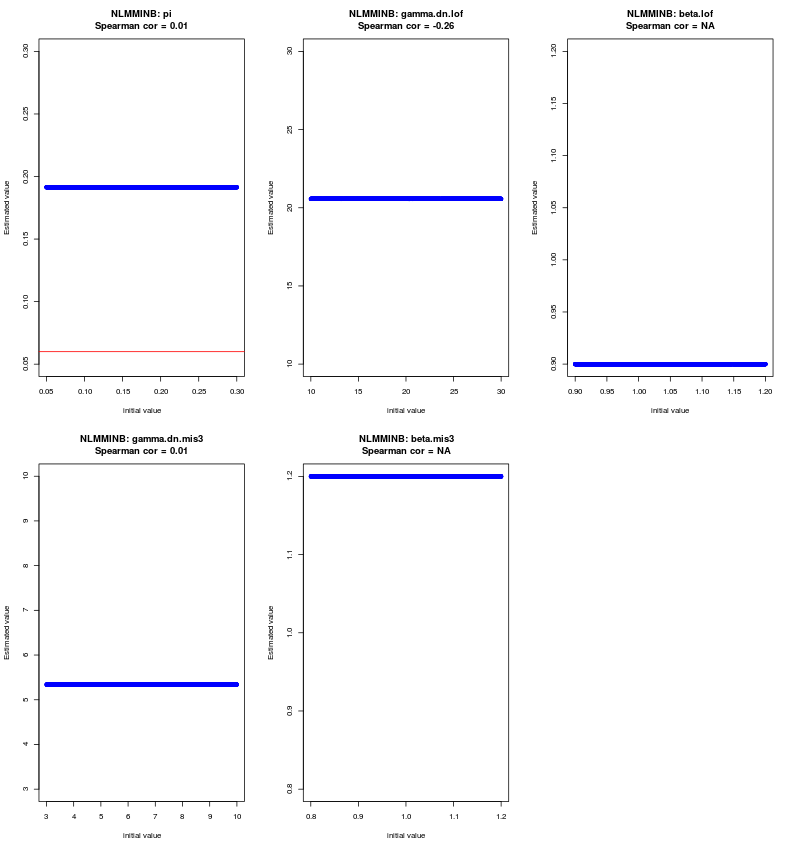

In [90]:
%%R -w 28 -h 30 -u cm

dimK <- floor(dim(nloptr.result)[2]/2)

print(dimK)
par(mfrow = c(2, 3))
colNames <- c("pi", "gamma.dn.lof", "beta.lof", "gamma.dn.mis3", "beta.mis3")
for (jj in 1:dimK){
plot(nloptr.result[[jj]], nloptr.result[[jj + dimK]], xlab = 'initial value', ylab = 'Estimated value',
    main = paste("NLMMINB: ", colNames[jj], "\nSpearman cor = ", 
                 round(cor(nloptr.result[[jj]], nloptr.result[[jj + dimK]], method = "spearman"), 2), sep = ""),
    ylim = range(nloptr.result[[jj]]), 
    col = 'blue')
    abline(h = 0.06, col = 'red')
    }

[1] 5


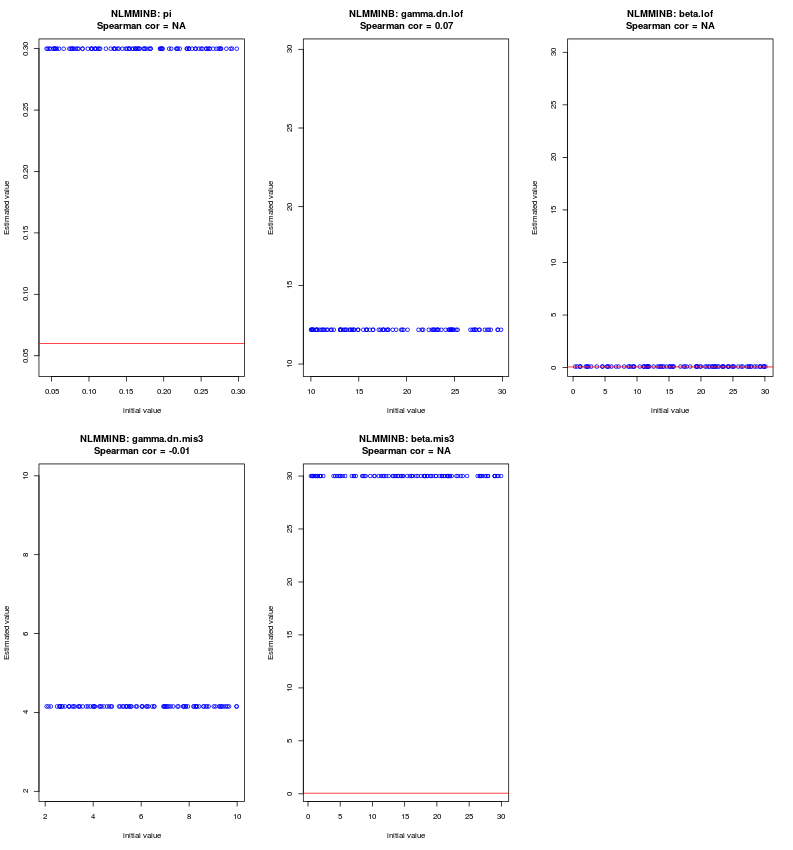

In [92]:
%%R -w 28 -h 30 -u cm


library("data.table")

dirFile = "/usr/data/Documents/SaveDataFromServer/CombinedDataThreeDiseases/"
fileN = "result.nloptr.outerProduct.TADA2013.nonlinearNLMMINB.onlyDenovo.LoF.mis3.geneSet.all20000.txt"
fileN = "result.nloptr.outerProduct.nonlinearNLMMINB.bothLoF.dnMis3.geneSet.FMRP.largeRange.txt"
fileN = "result.nloptr.outerProduct.nonlinearNLMMINB.onlyDenovo.LoF.dnMis3.geneSet.FMRP.txt"
#fileN = "result.nloptr.outerProduct.nonlinearNLMMINB.onlyDenovo.LoF.dnMis3.geneSet.FMRP.largeRanges.1.txt"
fileN = "result.nloptr.outerProduct.nonlinearNLMMINB.onlyDenovo.LoF.dnMis3.geneSet.FMRP.largeRanges.2.txt"


nloptr.result <- fread(paste(dirFile, fileN, sep = ""))



dimK <- floor(dim(nloptr.result)[2]/2)

print(dimK)
par(mfrow = c(2, 3))
colNames <- c("pi", "gamma.dn.lof", "beta.lof", "gamma.dn.mis3", "beta.mis3")
for (jj in 1:dimK){
plot(nloptr.result[[jj]], nloptr.result[[jj + dimK]], xlab = 'initial value', ylab = 'Estimated value',
    main = paste("NLMMINB: ", colNames[jj], "\nSpearman cor = ", 
                 round(cor(nloptr.result[[jj]], nloptr.result[[jj + dimK]], method = "spearman"), 2), sep = ""),
    ylim = range(nloptr.result[[jj]]), 
    col = 'blue')
    abline(h = 0.06, col = 'red')
    }


##Use MCMC in FMRP

In [64]:
%%R
library("data.table")

dirFile = "/usr/data/Documents/SaveDataFromServer/CombinedDataThreeDiseases/"
fileN <- "results.rjags.onlyDenovoLoFandMis3.differentSegmentBeta.txt"

rjags.result <- fread(paste(dirFile, fileN, sep = ""))


dim(rjags.result)

[1] 300   9


In [65]:
%%R
head(rjags.result)

          V1       V2        V3       V4        V5        V6        V7
1: 0.1865456 21.66600 20.536786 5.748238 22.120666 14.855054 26.118682
2: 0.1890372 21.42456  3.444760 5.752453 12.920383  1.852391  5.211594
3: 0.1839921 22.01763 13.876997 5.756680 16.967061  5.298983 22.851966
4: 0.1787742 22.57523 19.265759 5.857711  4.744963 15.240425 23.372559
5: 0.1914253 21.09853  2.491254 5.704319  8.843619  1.746257  3.257531
6: 0.1823700 21.96788 25.449956 5.808193 22.036405 23.653413 27.249232
          V8       V9
1: 16.226638 28.01895
2:  3.640263 21.61513
3: 11.153817 22.65362
4:  0.400485  7.84912
5:  6.440871 11.23131
6: 16.845342 27.21402


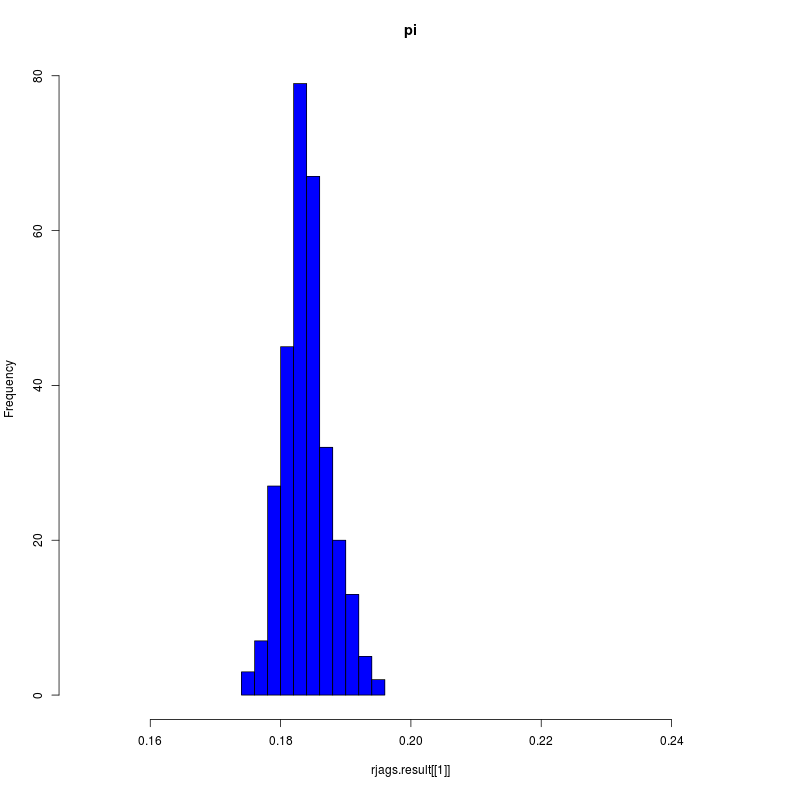

In [66]:
%%R -w 28 -h 28 -u cm
hist(rjags.result[[1]], main = 'pi', col = 'blue', xlim = c(0.15, 0.25))

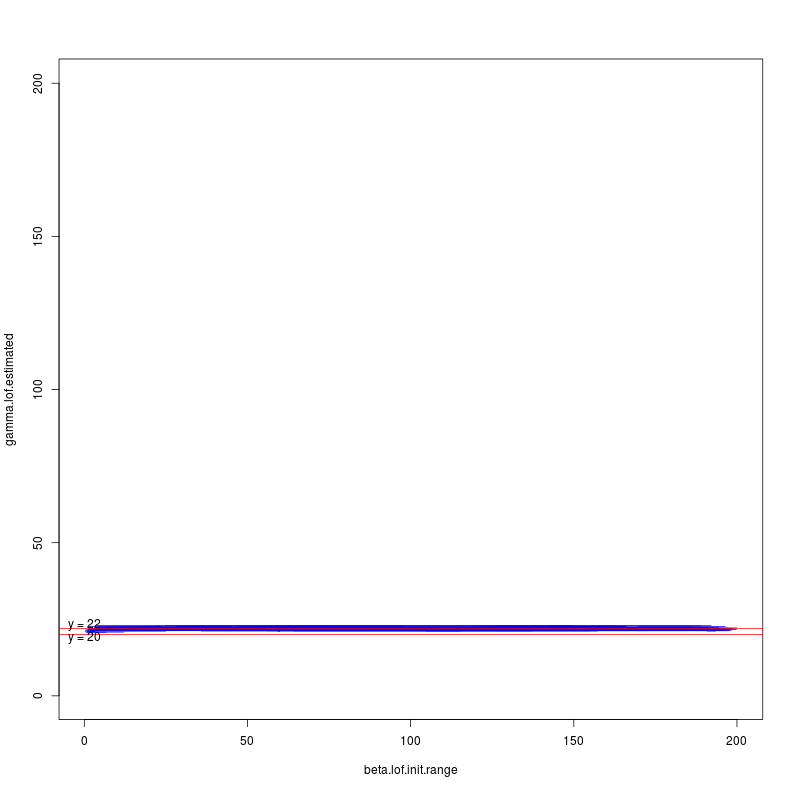

In [77]:
%%R -w 28 -h 28 -u cm
beta.lof.range <- range(rjags.result[[6]], rjags.result[[7]])

plot(beta.lof.range, beta.lof.range, col = 'white', xlab = 'beta.lof.init.range', 
         ylab = 'gamma.lof.estimated')
apply(rjags.result, 1, function(x){
    lines(x[6:7], c(x[2], x[2]), col = 'blue')
})
abline(h = 20, col = 'red')
text(0, 19, 'y = 20')
abline(h = 22, col = 'red')
text(0, 23, 'y = 22')


#hist(rjags.result[[1]], 100)

NULL


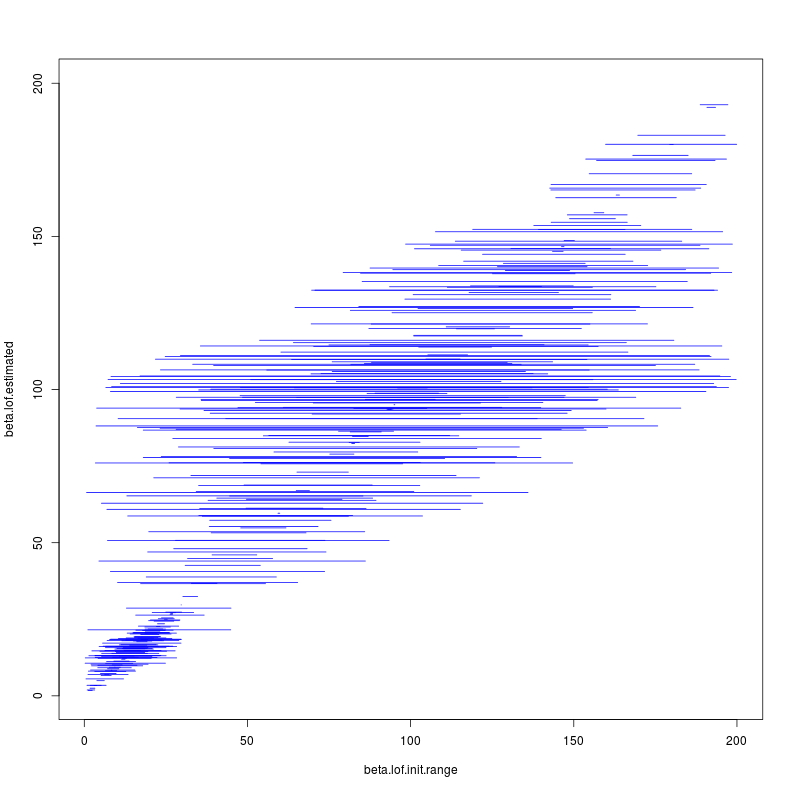

In [78]:
%%R -w 28 -h 28 -u cm
beta.lof.range <- range(rjags.result[[6]], rjags.result[[7]])

plot(beta.lof.range, beta.lof.range, col = 'white', xlab = 'beta.lof.init.range', 
         ylab = 'beta.lof.estimated')
apply(rjags.result, 1, function(x){
    lines(x[6:7], c(x[3], x[3]), col = 'blue')
})
#hist(rjags.result[[1]], 100)

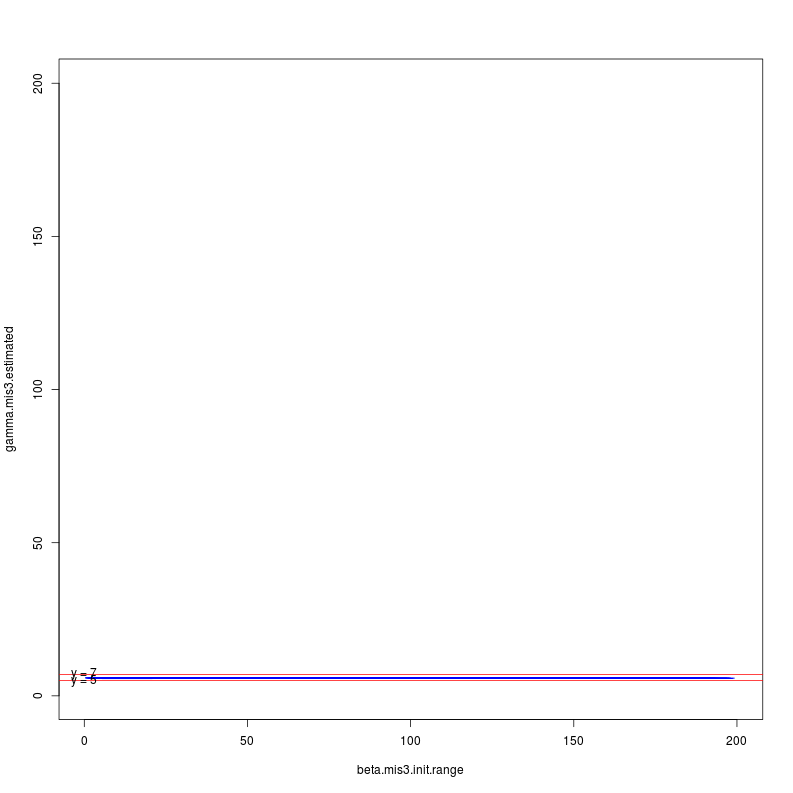

In [80]:
%%R -w 28 -h 28 -u cm
beta.lof.range <- range(rjags.result[[6]], rjags.result[[7]])

plot(beta.lof.range, beta.lof.range, col = 'white', xlab = 'beta.mis3.init.range', 
         ylab = 'gamma.mis3.estimated')
apply(rjags.result, 1, function(x){
    lines(x[8:9], c(x[4], x[4]), col = 'blue')
})
abline(h = 5, col = 'red')
text(0, 5, 'y = 5')
abline(h = 7, col = 'red')
text(0, 7, 'y = 7')


#hist(rjags.result[[1]], 100)

NULL


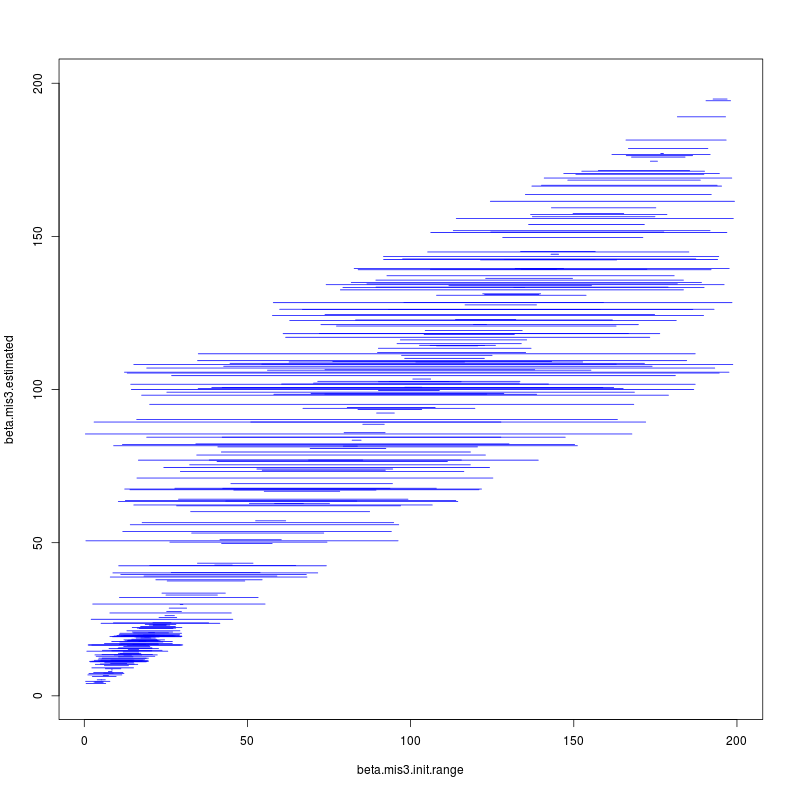

In [81]:
%%R -w 28 -h 28 -u cm
beta.lof.range <- range(rjags.result[[6]], rjags.result[[7]])

plot(beta.lof.range, beta.lof.range, col = 'white', xlab = 'beta.mis3.init.range', 
         ylab = 'beta.mis3.estimated')
apply(rjags.result, 1, function(x){
    lines(x[8:9], c(x[5], x[5]), col = 'blue')
})


#hist(rjags.result[[1]], 100)

[1] 0.1841942


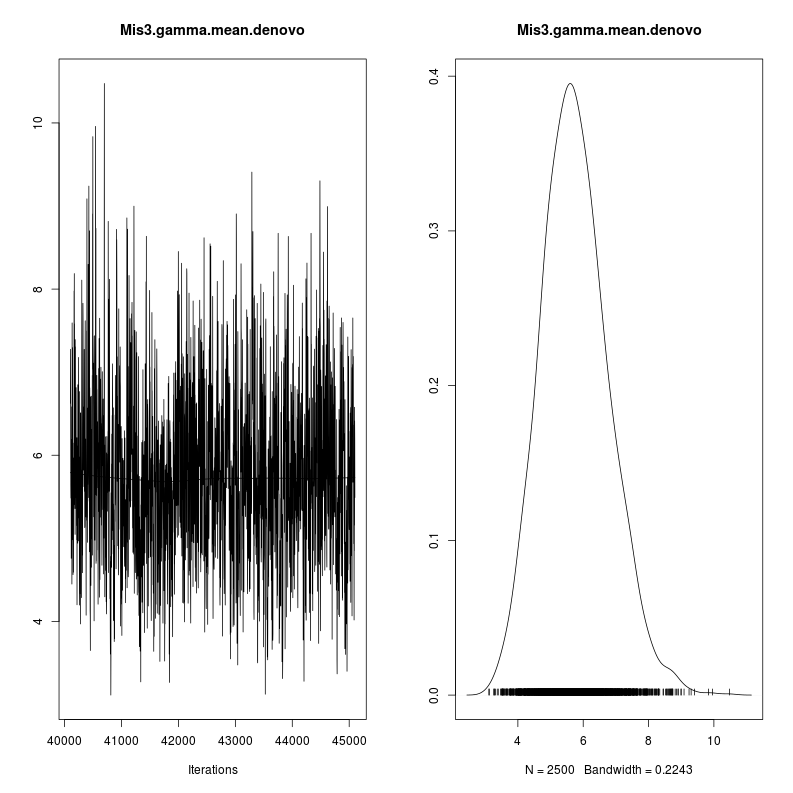

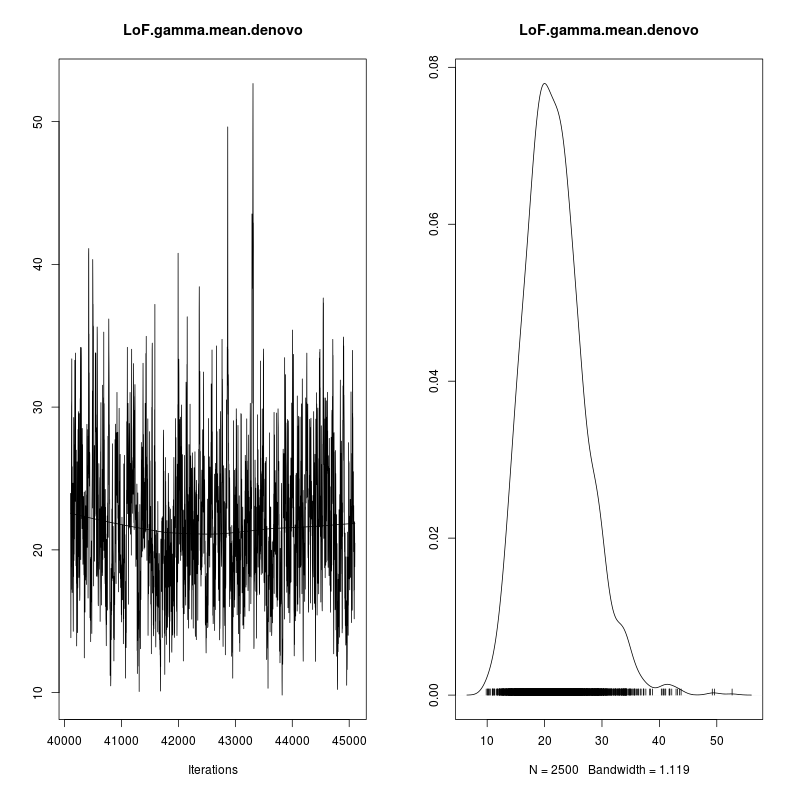

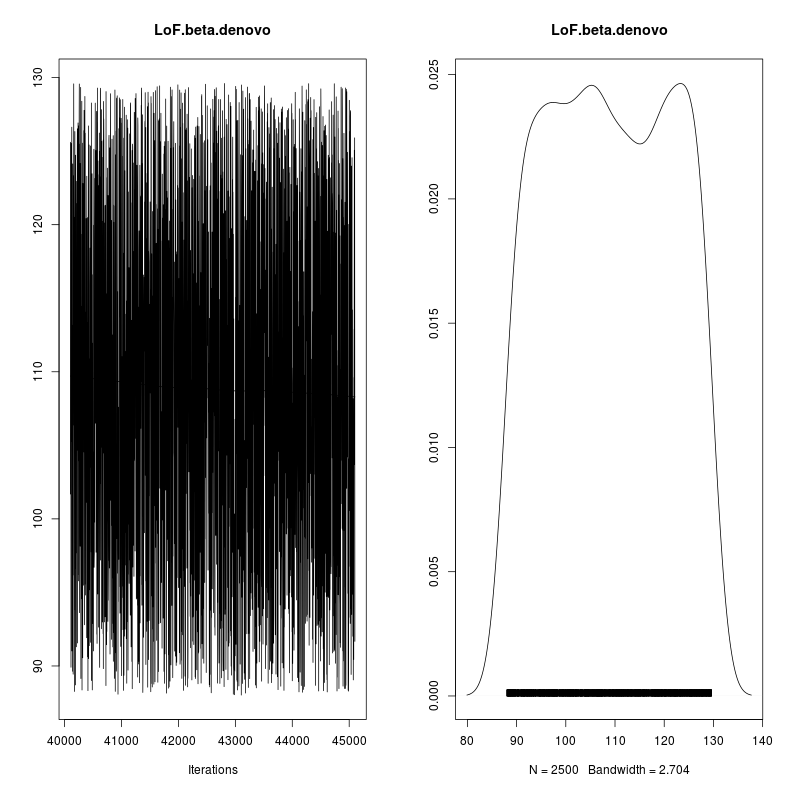

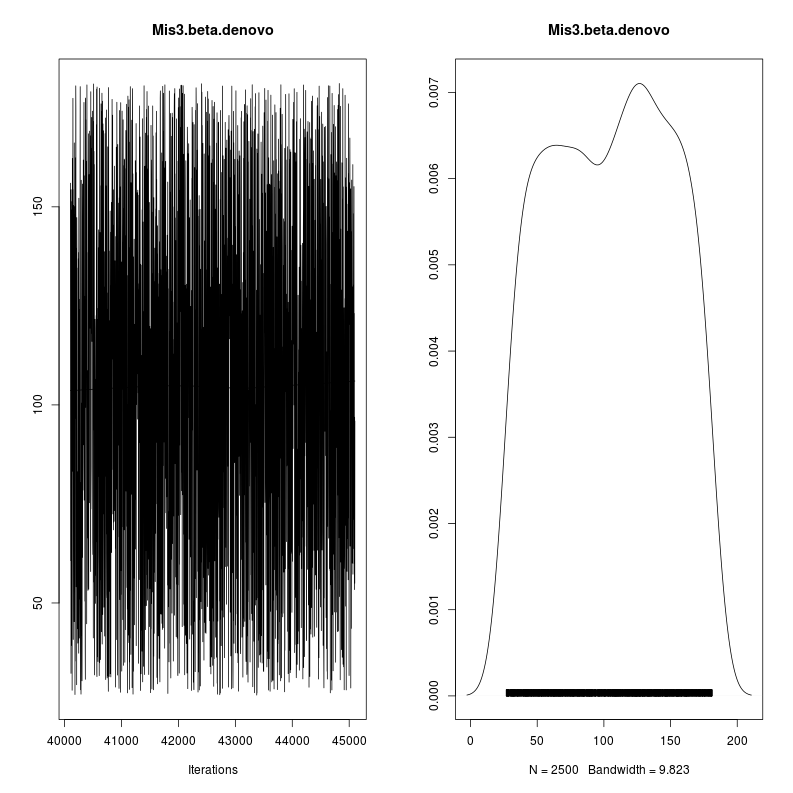

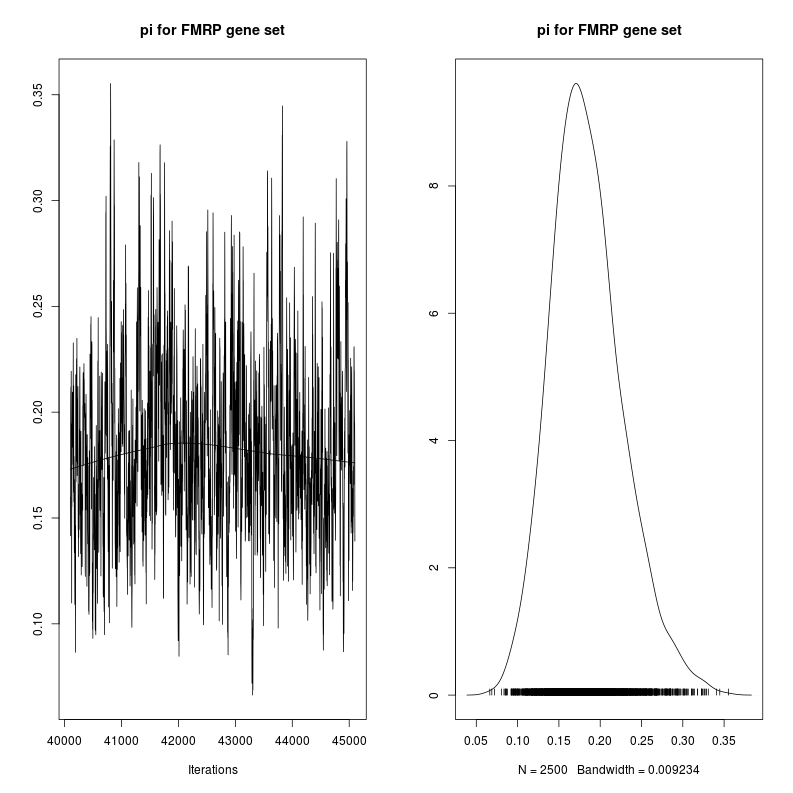

In [105]:
%%R -w 28 -h 28 -u cm
library("rjags")
listP <- list()
jj = 6
load("/usr/data/Documents/SaveDataFromServer/RunRjags/Loop/test.2013Data.negativeBinomial.nRun5000.nBurnIn.40000.kk.99.geneSet.NA.2.RData")
mcmc.gamma.mean.lof <- mcmc.list(lapply(xem1, function(x) x[, 'gamma.mean.alt.lof']))
plot(mcmc.gamma.mean.lof, main = 'LoF.gamma.mean.denovo')
out.gamma.lof <- median(sapply(mcmc.gamma.mean.lof, mean))
    
    mcmc.gamma.mean.mis3 <- mcmc.list(lapply(xem1, function(x) x[, 'gamma.mean.alt.mis3']))
plot(mcmc.gamma.mean.mis3, main = 'Mis3.gamma.mean.denovo')
out.gamma.mis3 <- median(sapply(mcmc.gamma.mean.mis3, mean))

#pdf("/Users/hoang/Documents/GitHub/TestR/HBproject/Presentation/MCMC.FMRP.beta.alt.lof.pdf")
#png("/Users/hoang/Documents/GitHub/TestR/HBproject/Presentation/MCMC_FMRP_beta_lof.png")
mcmc.beta.mean.lof <-   mcmc.list(lapply(xem1, function(x) x[, 'beta.mean.alt.lof']))
plot(mcmc.beta.mean.lof, main = 'LoF.beta.denovo')
out.beta.lof <- median(sapply(mcmc.beta.mean.lof, mean))

mcmc.beta.mean.mi3 <-   mcmc.list(lapply(xem1, function(x) x[, 'beta.mean.alt.mis3']))
plot(mcmc.beta.mean.mi3, main = 'Mis3.beta.denovo')
out.beta.mis3 <- median(sapply(mcmc.beta.mean.mi3, mean))


mcmc.p2 <- mcmc.list(lapply(xem1, function(x) x[, 'p1[2]']))
m2 <- sapply(mcmc.p2, mean)
plot(mcmc.p2, main = 'pi for FMRP gene set')
abline(v = m2, col = 'red')
out.p2 <- median(sapply(mcmc.p2, mean))
listP[jj] <- out.p2
out.p2



In [ ]:
Ncount <- N
NN <- length(y1)

beta.mis3.init <- sort(runif(2, 0.1, 200))
beta.lof.init <-  sort(runif(2, 0.1, 200))

dataJags <- list(y.lof = y1,
                 y.mis3 = y2,
                 alpha0 = c(1, 1),
                 NN = NN,
                 T = c(NA, rep(NA, NN - 2), NA),
                 murate.lof = murate1, murate.mis3 = murate2,
                 #              m1 = m1, m2 = m2,                                                                                                     
                 Ndn = N$dn,
                 beta.mis3 = beta.mis3.init,
                 beta.lof = beta.lof.init)

jagsFile = "model {                                                                                                                                   
                                                                                                                                                      
           p1[1:2] ~ ddirch(alpha0[])                                                                                                                 
#p1[1] <- 1- p1[2]                                                                                                                                    
#p1[2] ~ dunif(0.15, 0.22)                                                                                                                            
          gamma.mean.null ~ dnorm(1, 100000)                                                                                                          
          beta.mean.null ~ dnorm(100000, 100000)                                                                                                      
                                                                                                                                                      
  gamma.mean.alt.lof ~ dunif(1, 60)                                                                                                                   
  beta.mean.alt.lof ~ dunif(beta.lof[1], beta.lof[2])#dnorm(1, 1000)                                                                                  
                                                                                                                                                      
                                                                                                                                                      
gamma.mean.alt.mis3 ~ dunif(1, 20)                                                                                                                    
beta.mean.alt.mis3 ~ dunif(beta.mis3[1], beta.mis3[2])#dnorm(1, 1000)                        

for (i in 1:NN){                                                                                                                                      
                                                                                                                                                      
##########Null hypothesis                                                                                                                             
            gamma.mean.lof[i, 1] <- gamma.mean.null                                                                                                   
            beta.mean.lof[i, 1]  <- beta.mean.null                                                                                                    
                                                                                                                                                      
            gamma.mean.mis3[i, 1] <- gamma.mean.null                                                                                                  
            beta.mean.mis3[i, 1] <- beta.mean.null                                                                                                    
                                                                                                                                                      
##########Alternative hypothesis                                                                                                                      
            gamma.mean.lof[i, 2] <- gamma.mean.alt.lof                                                                                                
            beta.mean.lof[i, 2] <- beta.mean.alt.lof                                                                                                  
                                                                                                                                                      
            gamma.mean.mis3[i, 2] <- gamma.mean.alt.mis3                                                                                              
            beta.mean.mis3[i, 2] <- beta.mean.alt.mis3                                                                                                
                                                                                                                                                      
####Negative binomial for LOF: size and prob                                                                                                          
            sizeI.lof[i] <- gamma.mean.lof[i, T[i]]*beta.mean.lof[i, T[i]]                                                                            
            probI.lof[i] <- beta.mean.lof[i, T[i]]/(beta.mean.lof[i, T[i]] + 2*Ndn*murate.lof[i])                                                     
           y.lof[i] ~ dnegbin(probI.lof[i], sizeI.lof[i])                                                                                             
                                                                                                                                                      
####Negative binomial for mis3: size and prob                                                                                                         
            sizeI.mis3[i] <- gamma.mean.mis3[i, T[i]]*beta.mean.mis3[i, T[i]]                                                                         
            probI.mis3[i] <- beta.mean.mis3[i, T[i]]/(beta.mean.mis3[i, T[i]] + 2*Ndn*murate.mis3[i])                                                 
           y.mis3[i] ~ dnegbin(probI.mis3[i], sizeI.mis3[i])                                                                                          
                                                                                                                                                      
                                                                                                                                                      
           T[i] ~ dcat(p1[])                                                                                                                          
       }                                                                                                                                              
                                                                                                                                                      
}                                                                                                                                                     
"


n.chains = 1
n.adapt = 100
mixture <- jags.model(textConnection(jagsFile),# inits = inits,                                                                                       
                      data = dataJags, n.chains = n.chains, n.adapt = n.adapt)

nUpdate = nUpdate
update(mixture, nUpdate)

n.iter = nRun
thin = 2
xem1 <- coda.samples(mixture, c('gamma.mean.alt.lof', 'beta.mean.alt.lof', 'p1', 'gamma.mean.alt.mis3', 'beta.mean.alt.mis3'),
                   n.iter = n.iter, thin = thin)

mcmc.gamma.mean.lof <- mcmc.list(lapply(xem1, function(x) x[, 'gamma.mean.alt.lof']))
out.gamma.lof <- median(sapply(mcmc.gamma.mean.lof, mean))

mcmc.gamma.mean.mis3 <- mcmc.list(lapply(xem1, function(x) x[, 'gamma.mean.alt.mis3']))
out.gamma.mis3 <- median(sapply(mcmc.gamma.mean.mis3, mean))

mcmc.beta.mean.lof <-   mcmc.list(lapply(xem1, function(x) x[, 'beta.mean.alt.lof']))
out.beta.lof <- median(sapply(mcmc.beta.mean.lof, mean))

mcmc.beta.mean.mi3 <-   mcmc.list(lapply(xem1, function(x) x[, 'beta.mean.alt.mis3']))
out.beta.mis3 <- median(sapply(mcmc.beta.mean.mi3, mean))

mcmc.p2 <- mcmc.list(lapply(xem1, function(x) x[, 'p1[2]']))
m2 <- sapply(mcmc.p2, mean)
out.p2 <- median(sapply(mcmc.p2, mean))

out.All.data <- NULL
out.All.data <- c(out.p2, out.gamma.lof, out.beta.lof, out.gamma.mis3, out.beta.mis3)
out.All.data <- c(out.All.data, beta.lof.init, beta.mis3.init)
names(out.All.data) <- c("pi", "gamma.mean.lof", "beta.lof", "gamma.mean.mis3", "beta.mis3", "beta.lof.init[1]", "beta.lof.init[2]", "beta.mis3.init[\
1]", "beta.mis3.init[2]")
xout <- out.All.data


write.table(t(xout), paste(mainDir, "/testRJAGS/Loop/result.onlyDenovo.bothLoF.Mis3.",
        geneSet, ".loop.", kk, ".final.txt", sep = ""),
        col.names = FALSE, row.names = FALSE, quote = FALSE)

save.image(paste(mainDir, "/testRJAGS/Loop/test.2013Data.negativeBinomial.nRun", nRun, ".nBurnIn.", nUpdate, ".kk.", kk, ".geneSet.",
        geneSet, ".2.RData", sep = ""))

